In [86]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import numpy.linalg
from scipy import *

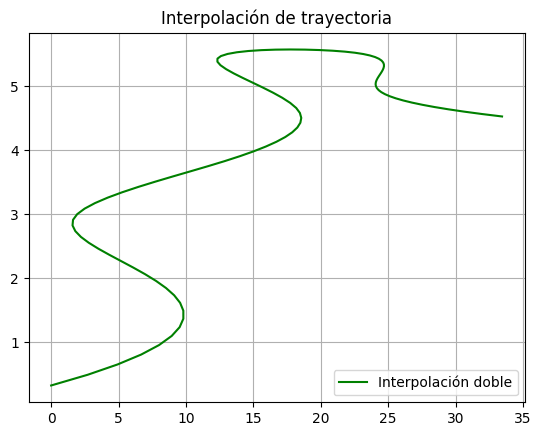

In [87]:
data_auto1 = np.loadtxt("pvd_data/mnyo_mediciones.csv", delimiter=",")

# Paso los datos a un array de numpy
data_array_auto1 = np.array(data_auto1)
x_value_array_auto1 = data_array_auto1[:, 0]
y_value_array_auto1 = data_array_auto1[:, 1]

# Tiempo
time_value_array = np.array(range(0,10))
tiempo_auto_1 = np.linspace(min(time_value_array), max(time_value_array), 100)

# Interpolo los datos con Splines
funcion_interpolada_ejeX_auto1 = sp.interpolate.interp1d(time_value_array, x_value_array_auto1, 'cubic')
funcion_interpolada_ejeY_auto1 = sp.interpolate.interp1d(time_value_array, y_value_array_auto1, 'cubic')

# Grafico la función
plt.plot(funcion_interpolada_ejeX_auto1(tiempo_auto_1), funcion_interpolada_ejeY_auto1(tiempo_auto_1), color='green', label='Interpolación doble')

plt.title('Interpolación de trayectoria')
plt.legend()
plt.grid(True)
plt.show()

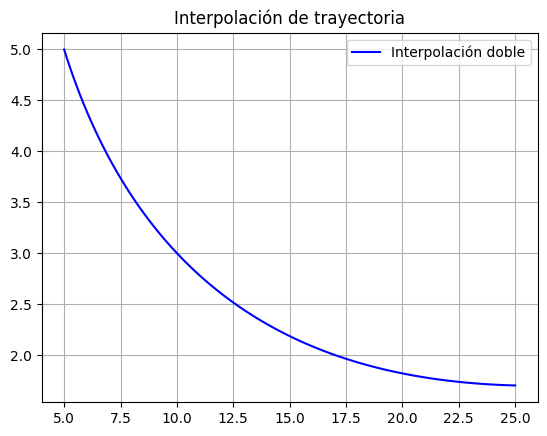

In [88]:
data_auto2 = np.loadtxt("pvd_data/mnyo_mediciones2.csv", delimiter=",")

# Paso los datos a un array de numpy
data_array_auto2 = np.array(data_auto2)
x_value_array_auto2 = data_array_auto2[:, 0]
y_value_array_auto2 = data_array_auto2[:, 1]

# Tiempo
time_value_array = np.array(range(0, len(x_value_array_auto2)))
tiempo_auto_2 = np.linspace(min(time_value_array), max(time_value_array), 100)

# Interpolo los datos con Splines
funcion_interpolada_ejeX_auto2 = sp.interpolate.interp1d(time_value_array, x_value_array_auto2, 'cubic')
funcion_interpolada_ejeY_auto2 = sp.interpolate.interp1d(time_value_array, y_value_array_auto2, 'cubic')

# Grafico la función
plt.plot(funcion_interpolada_ejeX_auto2(tiempo_auto_2), funcion_interpolada_ejeY_auto2(tiempo_auto_2), color='blue', label='Interpolación doble')

plt.title('Interpolación de trayectoria')
plt.legend()
plt.grid(True)
plt.show()

8.09706957228083 3.5290958043710274


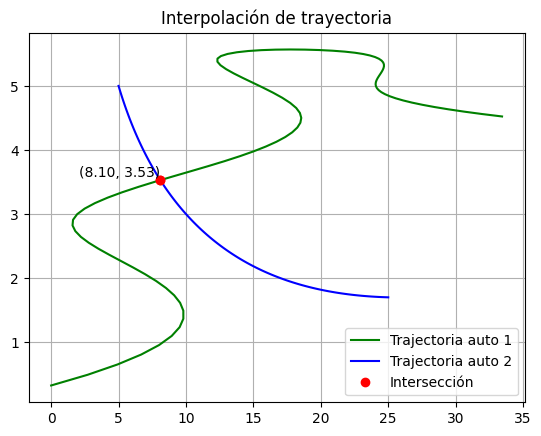

In [94]:
# calculo la intersección de las dos funciones

def f(x):
    return np.array([funcion_interpolada_ejeX_auto1(x[0]) - funcion_interpolada_ejeX_auto2(x[1]), funcion_interpolada_ejeY_auto1(x[0]) - funcion_interpolada_ejeY_auto2(x[1])])

def g(x):
    return funcion_interpolada_ejeY_auto1(x) - funcion_interpolada_ejeY_auto2(x)

def jacobian(f, x):
    h = 1.0e-5
    n = len(x)
    jac = np.zeros((n, n))
    f0 = f(x)
    for i in range(n):
        temp = x[i]
        x[i] = temp + h
        f1 = f(x)
        x[i] = temp
        jac[:, i] = (f1 - f0)/h
    return jac

def newton_raphson(f, x):
    tol = 1.0e-6
    max_iter = 100
    for i in range(max_iter):
        delta = np.linalg.solve(jacobian(f, x), -f(x))
        x_new = x + delta
        x_new = np.clip(x_new, 0, 3)
        x = x_new
    return x

x0 = np.array([0.0, 0.0])
interseccion = newton_raphson(f, x0)

x_intersection = funcion_interpolada_ejeX_auto1(interseccion[0])
y_intersection = funcion_interpolada_ejeY_auto1(interseccion[0])
print(x_intersection, y_intersection)

plt.plot(funcion_interpolada_ejeX_auto1(tiempo_auto_1), funcion_interpolada_ejeY_auto1(tiempo_auto_1), color='green', label='Trajectoria auto 1')
plt.plot(funcion_interpolada_ejeX_auto2(tiempo_auto_2), funcion_interpolada_ejeY_auto2(tiempo_auto_2), color='blue', label='Trajectoria auto 2')
plt.plot(funcion_interpolada_ejeX_auto1(interseccion[0]), funcion_interpolada_ejeY_auto1(interseccion[0]), 'ro', label='Intersección')
plt.plot(funcion_interpolada_ejeX_auto2(interseccion[1]), funcion_interpolada_ejeY_auto2(interseccion[1]), 'ro')
plt.text(x_intersection, y_intersection, f'({x_intersection:.2f}, {y_intersection:.2f})', ha='right', va='bottom')
plt.title('Interpolación de trayectoria')
plt.legend()
plt.grid(True)
plt.show()